In [1]:
import pandas as pd
import numpy as np

In [2]:
#load dataset
dataframe = pd.read_table("housing.data.txt",delim_whitespace=True, header=None )

In [3]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
dataset = dataframe.values
#split into input(x) i.e. predictor and output(y) i.e. response 
X = dataset[:,0:13]
Y = dataset[:,13]

In [7]:
# create training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2) 

In [8]:
X_train.shape

(404, 13)

In [9]:
X_train

array([[1.10690e-01, 0.00000e+00, 1.38900e+01, ..., 1.64000e+01,
        3.96900e+02, 1.79200e+01],
       [2.22120e-01, 0.00000e+00, 1.00100e+01, ..., 1.78000e+01,
        3.96900e+02, 1.70900e+01],
       [4.56000e-02, 0.00000e+00, 1.38900e+01, ..., 1.64000e+01,
        3.92800e+02, 1.35100e+01],
       ...,
       [1.62110e-01, 2.00000e+01, 6.96000e+00, ..., 1.86000e+01,
        3.96900e+02, 6.59000e+00],
       [8.15174e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 2.08500e+01],
       [5.73116e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.95280e+02, 7.01000e+00]])

In [10]:
scaler = StandardScaler().fit(X_train)
std_X_train = scaler.transform(X_train)

In [11]:
std_X_train

array([[-0.39440304, -0.4896388 ,  0.40074984, ..., -0.93150011,
         0.4482472 ,  0.77213654],
       [-0.38188656, -0.4896388 , -0.16624873, ..., -0.28377886,
         0.4482472 ,  0.65167723],
       [-0.40171433, -0.4896388 ,  0.40074984, ..., -0.93150011,
         0.40318574,  0.13210577],
       ...,
       [-0.38862724,  0.38054299, -0.61195638, ...,  0.08634756,
         0.4482472 , -0.87220556],
       [ 0.50881559, -0.4896388 ,  1.01597252, ...,  0.82660042,
         0.4482472 ,  1.1973724 ],
       [ 0.23692163, -0.4896388 ,  1.01597252, ...,  0.82660042,
         0.43044243, -0.81125025]])

In [12]:
# Use K-NN Regressor
# Find neighbors by using all the numeric columns in the dataset to generate similarity scores.
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [39]:
# Create the knn model
# Use 10 neighbors, inverse-distance as weights
# Algo can use {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}
# p=2 means Euclidean distance
knn = KNeighborsRegressor(n_neighbors=3,weights='distance',algorithm='auto',p=2)

In [51]:
# Fit the model on the training data.
knn.fit(std_X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='distance')

In [15]:
# also standardize xtest
scaler2 = StandardScaler().fit(X_test)
std_X_test = scaler2.transform(X_test)

In [52]:
# Make point predictions on the test set using the fit model.
predictions = knn.predict(std_X_test)

In [53]:
#Test score results
from sklearn.metrics import r2_score

In [54]:
r2_score(Y_test, predictions)

0.8245825319244126

In [44]:
import matplotlib.pyplot as plt

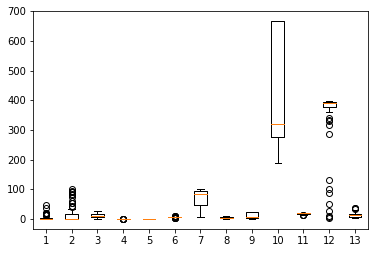

In [48]:
plt.figure()
plt.boxplot(X_test)
plt.show()

In [45]:
df_result =pd.concat([pd.DataFrame(Y_test), pd.DataFrame(predictions)], axis=1)

In [46]:
df_result.columns =['Y_test','Predicted']

In [47]:
df_result

,Y_test,Predicted
0,20.6,21.879194
1,41.3,23.451883
2,50.0,43.638393
3,43.1,35.510647
4,50.0,35.626980
5,14.1,13.580430
6,37.9,30.741079
7,23.7,23.327231
8,17.6,19.234459
9,28.7,25.494216


In [62]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """ Generate a simple plot of the test and traning learning curve. 
    Parameters ---------- 
    estimator : object type that implements the "fit" and "predict" methods.
    An object of that type which is cloned for each validation. 
    title : string Title for the chart. 
    X : array-like, shape (n_samples, n_features) 
    Training vector, where n_samples is the number of samples and n_features is the number of features. 
    y : array-like, shape (n_samples) or (n_samples, n_features), 
    optional Target relative to X for classification or regression; None for unsupervised learning. 
    ylim : tuple, shape (ymin, ymax), optional 
    Defines minimum and maximum yvalues plotted. 
    cv : integer, cross-validation generator, optional 
    If an integer is passed, it is the number of folds (defaults to 3). 
    Specific cross-validation objects can be passed, see sklearn.cross_validation module for the list of possible objects 
    n_jobs : integer, optional Number of jobs to run in parallel (default 1). """ 
    
    
    plt.figure() #Create figure (?)
    plt.title(title) #Give title to plot
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    #call learning_curve function - see documetation for further details
    train_sizes, train_scores, test_scores = learning_curve(estimator, X,y, cv=cv, n_jobs = n_jobs, train_sizes = train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label="Cross-validation score")
    
    plt.legend(loc='best')
    
    return plt

In [63]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [65]:
cv = ShuffleSplit(n_splits=10, test_size=0.2)
n_jobs=1

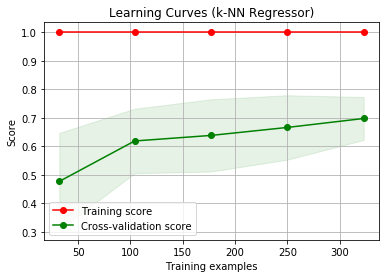

In [68]:
#OK we'll now call the plot_learning_curve module by feeding it the estimator (best estimator returned from GS) #and train/cv sets. 
#The module simply runs the estimator multiple times on subsets of the data provided and plots the train and cv scores.
#Note that we're feeding the best parameters we've learned from GridSearchCV to the estimator now. 
#We may need to adjust the hyperparameters further if there is overfitting (or underfitting, though unlikely)


title = "Learning Curves (k-NN Regressor)" 
estimator =  KNeighborsRegressor(n_neighbors=3,weights='distance',algorithm='auto',p=2)
plot_learning_curve(estimator, title, std_X_train, Y_train, cv=cv, n_jobs=n_jobs) #use cv and n_jobs from above
plt.show()